In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from scipy.stats import wilcoxon

sns.set_style("whitegrid")

In [2]:
ls dies6_rep3/

mat_Megalodon_20220817_dies6_rep3_all_plasmids_try2_ARS305_end_LexA.txt
mat_Megalodon_20220817_dies6_rep3_all_plasmids_try2_ARS313_end_LexA.txt
mat_Megalodon_20220817_dies6_rep3_all_plasmids_try2_ARS315_starting_LexA.txt
mat_Megalodon_20220817_dies6_rep3_all_plasmids_try2_ARS316_end_LexA.txt
mat_Megalodon_20220817_dies6_rep3_all_plasmids_try2_in_vitro_nucl_array.txt
mat_Megalodon_20220817_dies6_rep3_all_plasmids_try2_plasmid313_4133_4058.txt
mat_Megalodon_20220817_dies6_rep3_all_plasmids_try2_plasmid315_1058_983.txt
mat_Megalodon_20220817_dies6_rep3_all_plasmids_try2_plasmid316_1586_1511.txt


In [4]:
load_dir = "dies6_rep3"

In [9]:
ARS313_ori = np.loadtxt(load_dir + "/mat_Megalodon_20220817_dies6_rep3_all_plasmids_try2_ARS313_end_LexA.txt")
ARS313_plasmid = np.loadtxt(load_dir + "/mat_Megalodon_20220817_dies6_rep3_all_plasmids_try2_plasmid313_4133_4058.txt")

ARS315_ori = np.loadtxt(load_dir + "/mat_Megalodon_20220817_dies6_rep3_all_plasmids_try2_ARS315_starting_LexA.txt")
ARS315_plasmid = np.loadtxt(load_dir + "/mat_Megalodon_20220817_dies6_rep3_all_plasmids_try2_plasmid315_1058_983.txt")

ARS316_ori = np.loadtxt(load_dir + "/mat_Megalodon_20220817_dies6_rep3_all_plasmids_try2_ARS316_end_LexA.txt")
ARS316_plasmid = np.loadtxt(load_dir + "/mat_Megalodon_20220817_dies6_rep3_all_plasmids_try2_plasmid316_1586_1511.txt")

In [10]:
#summarise samples
array_dic = {"ARS313_ori": ARS313_ori,
             "ARS313_plasmid": ARS313_plasmid,
             "ARS315_ori": ARS315_ori,
             "ARS315_plasmid": ARS315_plasmid,
             "ARS316_ori": ARS316_ori,
             "ARS316_plasmid": ARS316_plasmid,
             
            }

summary=pd.DataFrame()
for element in array_dic.keys():
    summary[element] = pd.DataFrame(array_dic[element].mean(axis=0)).describe()
summary = summary.T
summary["#molecules"] = [array_dic[sample].shape[0] for sample in summary.index]
summary["#nucleotides"] = [array_dic[sample].shape[1] for sample in summary.index]
#summary = summary.T
summary

,count,mean,std,min,25%,50%,75%,max,#molecules,#nucleotides
ARS313_ori,1036.0,0.011632,0.017694,0.0,0.001695,0.005085,0.013559,0.145763,590,1036
ARS313_plasmid,4785.0,0.123902,0.124619,0.0,0.031250,0.083333,0.177083,0.666667,192,4785
ARS315_ori,1237.0,0.020899,0.029474,0.0,0.003300,0.009901,0.026403,0.168317,303,1237
ARS315_plasmid,4758.0,0.116834,0.136483,0.0,0.034483,0.068966,0.172414,0.758621,29,4758
ARS316_ori,1240.0,0.020363,0.047524,0.0,0.000000,0.000000,0.000000,0.333333,12,1240
ARS316_plasmid,4785.0,0.125478,0.116917,0.0,0.032258,0.090323,0.187097,0.612903,155,4785


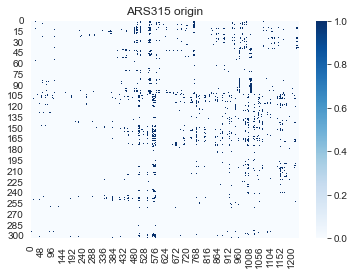

Text(0.5, 1.0, 'ARS315 plasmid')

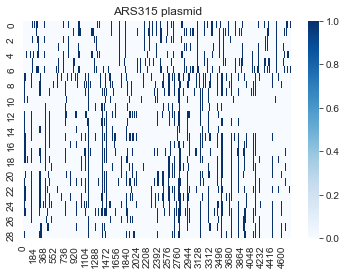

In [11]:
sns.heatmap(ARS315_ori, cmap="Blues")
plt.title("ARS315 origin")
plt.show()

sns.heatmap(ARS315_plasmid, cmap="Blues")
plt.title("ARS315 plasmid")

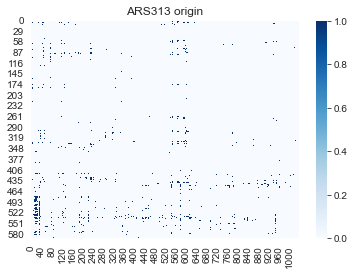

Text(0.5, 1.0, 'ARS313 plasmid')

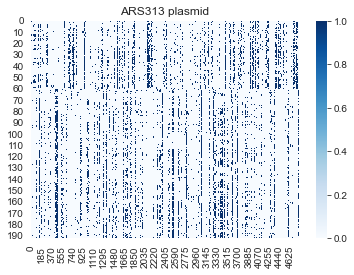

In [14]:
sns.heatmap(ARS313_ori, cmap="Blues")
plt.title("ARS313 origin")
plt.show()

sns.heatmap(ARS313_plasmid, cmap="Blues")
plt.title("ARS313 plasmid")

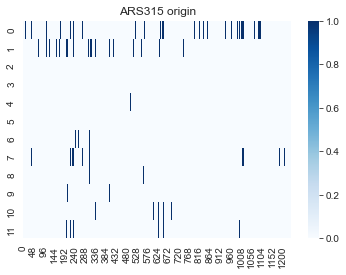

Text(0.5, 1.0, 'ARS315 plasmid')

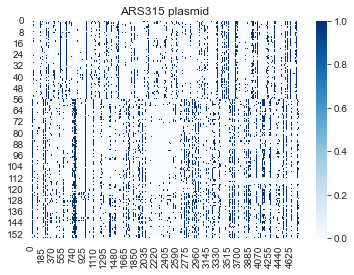

In [13]:
sns.heatmap(ARS316_ori, cmap="Blues")
plt.title("ARS315 origin")
plt.show()

sns.heatmap(ARS316_plasmid, cmap="Blues")
plt.title("ARS315 plasmid")

In [35]:
len(list(range(4081,4791)))

ARS305_wt_rep4_plasmid.mean(axis=0)[4081:4791].shape

(543,)

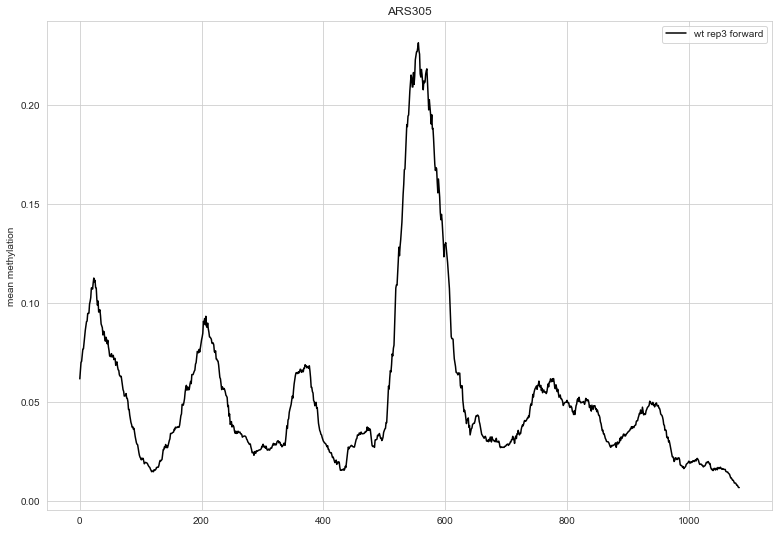

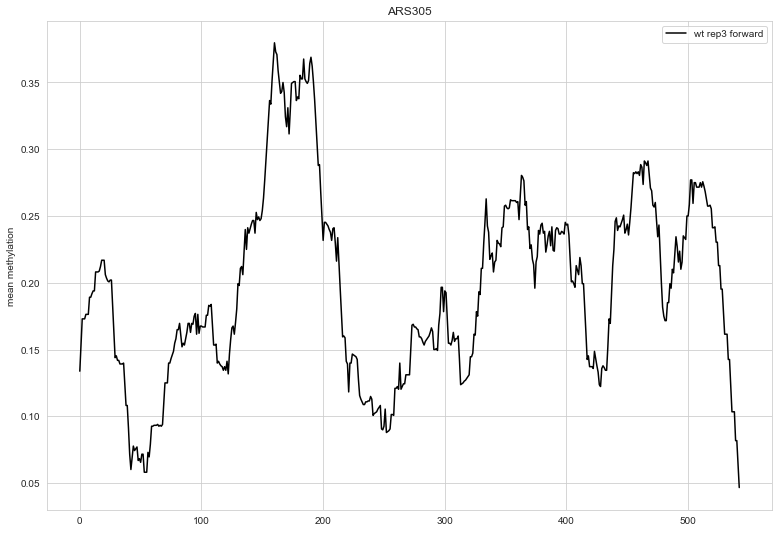

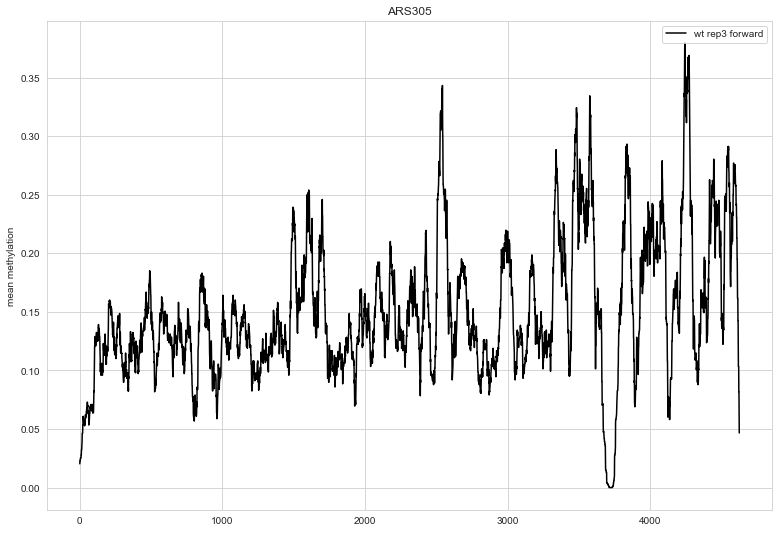

In [45]:
N=40

plt.figure(figsize=(13, 9))
sns.lineplot(x = range(1084), y = np.convolve(ARS305_wt_rep4_ori.mean(axis=0), np.ones(N)/N, mode ="same")
             , color ="black", label="wt rep3 forward")
plt.ylabel("mean methylation")
plt.title("ARS305")
plt.show()

plt.figure(figsize=(13, 9))
sns.lineplot(x = range(543), y = np.convolve(ARS305_wt_rep4_plasmid.mean(axis=0)[4081:4791], np.ones(N)/N, mode ="same")
             , color ="black", label="wt rep3 forward")
plt.ylabel("mean methylation")
plt.title("ARS305")
plt.show()

plt.figure(figsize=(13, 9))
sns.lineplot(x = range(4624), y = np.convolve(ARS305_wt_rep4_plasmid.mean(axis=0), np.ones(N)/N, mode ="same")
             , color ="black", label="wt rep3 forward")
plt.ylabel("mean methylation")
plt.title("ARS305")
plt.show()

### load strand separated data , 23rd Nov 2022

In [4]:
ls dies6_rep3/dies6_rep3_plus_strand/

mat_Megalodon_20220817_dies6_rep3_all_plasmids_try2_ARS305_end_LexA.txt
mat_Megalodon_20220817_dies6_rep3_all_plasmids_try2_ARS313_end_LexA.txt
mat_Megalodon_20220817_dies6_rep3_all_plasmids_try2_ARS315_starting_LexA.txt
mat_Megalodon_20220817_dies6_rep3_all_plasmids_try2_ARS316_end_LexA.txt
mat_Megalodon_20220817_dies6_rep3_all_plasmids_try2_in_vitro_nucl_array.txt
mat_Megalodon_20220817_dies6_rep3_all_plasmids_try2_plasmid313_4133_4058.txt
mat_Megalodon_20220817_dies6_rep3_all_plasmids_try2_plasmid315_1058_983.txt
mat_Megalodon_20220817_dies6_rep3_all_plasmids_try2_plasmid316_1586_1511.txt


In [6]:
load_dir_pl = "dies6_rep3/dies6_rep3_plus_strand/"

ARS305_dies6_rep3_ori_pl = np.loadtxt(load_dir_pl + "mat_Megalodon_20220817_dies6_rep3_all_plasmids_try2_ARS305_end_LexA.txt")

ARS313_dies6_rep3_ori_pl = np.loadtxt(load_dir_pl + "mat_Megalodon_20220817_dies6_rep3_all_plasmids_try2_ARS313_end_LexA.txt")
ARS313_dies6_rep3_plasmid_pl = np.loadtxt(load_dir_pl + "mat_Megalodon_20220817_dies6_rep3_all_plasmids_try2_plasmid313_4133_4058.txt")

ARS315_dies6_rep3_ori_pl = np.loadtxt(load_dir_pl + "mat_Megalodon_20220817_dies6_rep3_all_plasmids_try2_ARS315_starting_LexA.txt")
ARS315_dies6_rep3_plasmid_pl = np.loadtxt(load_dir_pl + "mat_Megalodon_20220817_dies6_rep3_all_plasmids_try2_plasmid315_1058_983.txt")

ARS316_dies6_rep3_ori_pl = np.loadtxt(load_dir_pl + "mat_Megalodon_20220817_dies6_rep3_all_plasmids_try2_ARS316_end_LexA.txt")
ARS316_dies6_rep3_plasmid_pl = np.loadtxt(load_dir_pl + "mat_Megalodon_20220817_dies6_rep3_all_plasmids_try2_plasmid316_1586_1511.txt")

nuc_array_pl = np.loadtxt(load_dir_pl + "mat_Megalodon_20220817_dies6_rep3_all_plasmids_try2_in_vitro_nucl_array.txt")

In [7]:
#summarise samples
array_dic = {"ARS305_ori": ARS305_dies6_rep3_ori_pl,
             "ARS313_ori": ARS313_dies6_rep3_ori_pl,
             "ARS313_plasmid": ARS313_dies6_rep3_plasmid_pl,
             "ARS315_ori": ARS315_dies6_rep3_ori_pl,
             "ARS315_plasmid": ARS315_dies6_rep3_plasmid_pl,
             "ARS316_ori": ARS316_dies6_rep3_ori_pl,
             "ARS316_plasmid": ARS316_dies6_rep3_plasmid_pl,
             "nuc_array": nuc_array_pl,
             
            }

summary=pd.DataFrame()
for element in array_dic.keys():
    summary[element] = pd.DataFrame(array_dic[element].mean(axis=0)).describe()
summary = summary.T
summary["#molecules"] = [array_dic[sample].shape[0] for sample in summary.index]
summary["#nucleotides"] = [array_dic[sample].shape[1] for sample in summary.index]
#summary = summary.T
summary

,count,mean,std,min,25%,50%,75%,max,#molecules,#nucleotides
ARS305_ori,1084.0,0.015555,0.027560,0.0,0.000000,0.007299,0.021898,0.226277,137,1084
ARS313_ori,1033.0,0.009511,0.021908,0.0,0.000000,0.000000,0.008197,0.226776,366,1033
ARS313_plasmid,4785.0,0.123902,0.124619,0.0,0.031250,0.083333,0.177083,0.666667,192,4785
ARS315_ori,1236.0,0.021747,0.047877,0.0,0.000000,0.000000,0.018519,0.351852,108,1236
ARS315_plasmid,4752.0,0.109026,0.190548,0.0,0.000000,0.000000,0.136364,1.000000,22,4752
ARS316_ori,1240.0,0.020363,0.047524,0.0,0.000000,0.000000,0.000000,0.333333,12,1240
ARS316_plasmid,4785.0,0.125478,0.116917,0.0,0.032258,0.090323,0.187097,0.612903,155,4785
nuc_array,1970.0,0.015585,0.034355,0.0,0.001923,0.004487,0.011538,0.307051,1560,1970


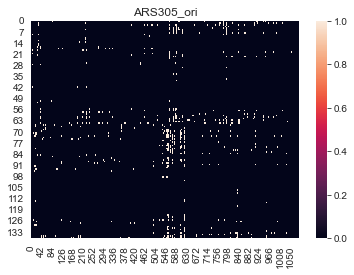

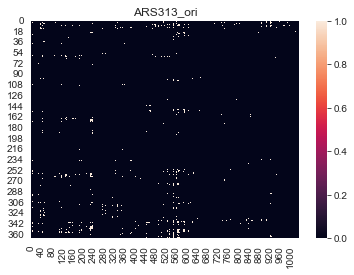

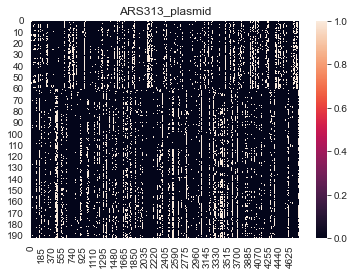

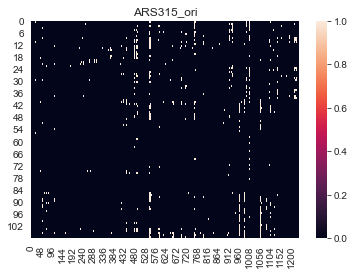

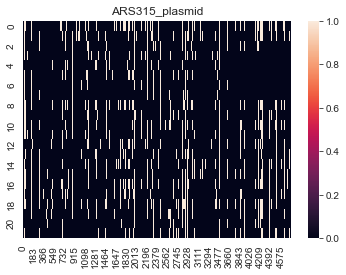

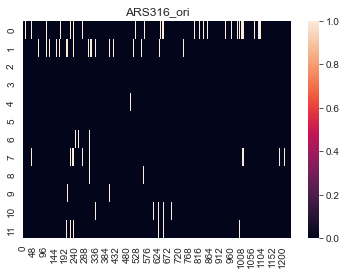

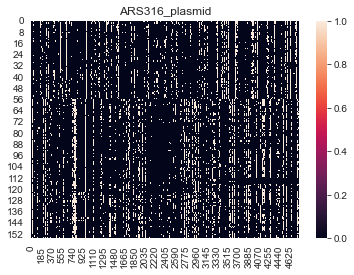

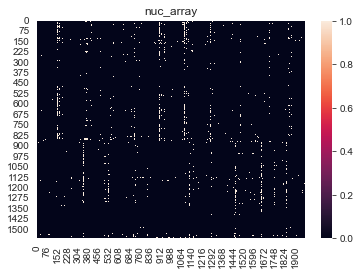

In [8]:
for element in array_dic.keys():
    sns.heatmap(array_dic[element])
    plt.title(element)
    plt.show()

In [3]:
N=40

plt.figure(figsize=(13, 9))
sns.lineplot(x = range(1966), y = np.convolve(nuc_array_pl.mean(axis=0), np.ones(N)/N, mode ="same")
             , color ="black")
plt.ylabel("mean methylation")
plt.title("nuc array wt rep4")
plt.show()

nuc_array_pl.mean(axis=0).mean() #this is in the range of the other experiments

## The negative strand

ls wt_rep4/wtrep4_minus_strand/

load_dir_neg = "wt_rep4/wtrep4_minus_strand/"

ARS305_wt_rep4_ori_neg = np.loadtxt(load_dir_neg + "mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_ARS305_end_LexA.txt")
ARS305_wt_rep4_plasmid_neg = np.loadtxt(load_dir_neg + "mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_ARS305_plasmid.txt")

ARS313_wt_rep4_ori_neg = np.loadtxt(load_dir_neg + "mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_ARS313_end_LexA.txt")
ARS313_wt_rep4_plasmid_neg = np.loadtxt(load_dir_neg + "mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_plasmid313_4133_4058.txt")

ARS315_wt_rep4_ori_neg = np.loadtxt(load_dir_neg + "mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_ARS315_starting_LexA.txt")
ARS315_wt_rep4_plasmid_neg = np.loadtxt(load_dir_neg + "mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_plasmid315_1058_983.txt")

ARS316_wt_rep4_ori_neg = np.loadtxt(load_dir_neg + "mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_ARS316_end_LexA.txt")
ARS316_wt_rep4_plasmid_neg = np.loadtxt(load_dir_neg + "mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_plasmid316_1586_1511.txt")

nuc_array_neg = np.loadtxt(load_dir_neg + "mat_Megalodon_20220727_wtrep4_meth_plus_extraPLASMIDS_in_vitro_nucl_array.txt")

#summarise samples
array_dic = {"ARS305_ori": ARS305_wt_rep4_ori_neg, 
             "ARS305_plasmid": ARS305_wt_rep4_plasmid_neg,
             "ARS313_ori": ARS313_wt_rep4_ori_neg,
             "ARS313_plasmid": ARS313_wt_rep4_plasmid_neg,
             "ARS315_ori": ARS315_wt_rep4_ori_neg,
             "ARS315_plasmid": ARS315_wt_rep4_plasmid_neg,
             "ARS316_ori": ARS316_wt_rep4_ori_neg,
             "ARS316_plasmid": ARS316_wt_rep4_plasmid_neg,
             "nuc_array": nuc_array_neg,
             
            }

summary=pd.DataFrame()
for element in array_dic.keys():
    summary[element] = pd.DataFrame(array_dic[element].mean(axis=0)).describe()
summary = summary.T
summary["#molecules"] = [array_dic[sample].shape[0] for sample in summary.index]
summary["#nucleotides"] = [array_dic[sample].shape[1] for sample in summary.index]
#summary = summary.T
summary

for element in array_dic.keys():
    sns.heatmap(array_dic[element])
    plt.title(element)
    plt.show()

N=40

plt.figure(figsize=(13, 9))
sns.lineplot(x = range(1970), y = np.convolve(nuc_array_neg.mean(axis=0), np.ones(N)/N, mode ="same")
             , color ="black")
plt.ylabel("mean methylation")
plt.title("nuc array wt rep4")
plt.show()

nuc_array_neg.mean(axis=0).mean() #this is in the range of the other experiments

## Join the strands in 1:1 ratio - subsample the plus strands, because in total they have more than the minus strand

def subsample(array, n):
    np.random.seed(15)
    idx = np.random.randint(len(array), size=n)
    return array[idx,:]

ARS313_wt_rep4_ori_pl.shape, ARS313_wt_rep4_ori_neg.shape #remove last 3 bp of minus strand

ARS313_ori = np.concatenate((subsample(ARS313_wt_rep4_ori_pl, ARS313_wt_rep4_ori_neg.shape[0]), 
                       ARS313_wt_rep4_ori_neg[:, :-3]), axis = 0)

ARS313_plasmid = np.concatenate((subsample(ARS313_wt_rep4_plasmid_pl[:, :-1], ARS313_wt_rep4_plasmid_neg.shape[0]),
                               ARS313_wt_rep4_plasmid_neg), axis = 0)

ARS315_ori = np.concatenate((subsample(ARS315_wt_rep4_ori_pl, ARS315_wt_rep4_ori_neg.shape[0]),
                            ARS315_wt_rep4_ori_neg[:, :-1]), axis = 0)

ARS315_plasmid = np.concatenate((subsample(ARS315_wt_rep4_plasmid_pl , ARS315_wt_rep4_plasmid_neg.shape[0]),
                                 ARS315_wt_rep4_plasmid_neg[:, :-6]), axis=0)

ARS316_ori = np.concatenate((subsample(ARS316_wt_rep4_ori_pl, ARS316_wt_rep4_ori_neg.shape[0]),
                            ARS316_wt_rep4_ori_neg[:, :-1]), axis = 0)

ARS316_plasmid = np.concatenate((subsample(ARS316_wt_rep4_plasmid_pl[:, :-3], ARS316_wt_rep4_plasmid_neg.shape[0]),
                                 ARS316_wt_rep4_plasmid_neg), axis=0)

nucarray = np.concatenate((subsample(nuc_array_pl, nuc_array_neg.shape[0]),
                                 nuc_array_neg[:, :-4]), axis=0)

sns.heatmap(nucarray)#, cmap= "Blues")
plt.title("Nuc array fw + rev")
plt.show()

sns.lineplot(x = range(1966), y = np.convolve(nucarray.mean(axis=0), np.ones(N)/N, mode ="same")
             , color ="black")
plt.ylabel("mean methylation")
plt.title("nuc array wt rep4")
plt.show()

nucarray.mean(axis=0).mean()

sns.lineplot(x = range(1033), y = np.convolve(ARS313_ori.mean(axis=0), np.ones(N)/N, mode ="same")
             , color ="black")
plt.ylabel("mean methylation")
plt.title("ARS313 origin")
plt.show()

sns.lineplot(x = range(4784), y = np.convolve(ARS313_plasmid.mean(axis=0), np.ones(N)/N, mode ="same")
             , color ="black")
plt.ylabel("mean methylation")
plt.title("ARS313 plamid")
plt.show()

#### select the overlap and plot both origin and plasmid in the same plot

sns.lineplot(x = range(669), y = np.convolve(ARS313_ori[:,0:669].mean(axis=0), np.ones(N)/N, mode ="same")
             , color ="black", label = "origin")
sns.lineplot(x = range(669), y = np.convolve(ARS313_plasmid[:,214:883].mean(axis=0), np.ones(N)/N, mode ="same")
             , color ="blue", label = "plasmid")
plt.ylabel("mean methylation")
plt.title("ARS313 plamid")
plt.show()

##Summarise ARS315
sns.lineplot(x = range(ARS315_ori.shape[1]), y = np.convolve(ARS315_ori.mean(axis=0), np.ones(N)/N, mode ="same")
             , color ="black")
plt.ylabel("mean methylation")
plt.title("ARS315 origin")
plt.show()

sns.lineplot(x = range(ARS315_plasmid.shape[1]), y = np.convolve(ARS315_plasmid.mean(axis=0), np.ones(N)/N, mode ="same")
             , color ="black")
plt.ylabel("mean methylation")
plt.title("ARS315 plamid")
plt.show()

#### select the overlap and plot both origin and plasmid in the same plot

sns.lineplot(x = range(178,1018), y = np.convolve(ARS315_ori[:,178:1018].mean(axis=0), np.ones(N)/N, mode ="same")
             , color ="black", label = "origin")
sns.lineplot(x = range(178,1018), y = np.convolve(ARS315_plasmid[:,3912:4752].mean(axis=0), np.ones(N)/N, mode ="same")
             , color ="blue", label = "plasmid")
plt.ylabel("mean methylation")
plt.title("ARS315 samples")
plt.show()

## For ARS316
sns.lineplot(x = range(ARS316_ori.shape[1]), y = np.convolve(ARS316_ori.mean(axis=0), np.ones(N)/N, mode ="same")
             , color ="black")
plt.ylabel("mean methylation")
plt.title("ARS316 origin")
plt.show()

sns.lineplot(x = range(ARS316_plasmid.shape[1]), y = np.convolve(ARS316_plasmid.mean(axis=0), np.ones(N)/N, mode ="same")
             , color ="black")
plt.ylabel("mean methylation")
plt.title("ARS316 plamid")
plt.show()

#### select the overlap and plot both origin and plasmid in the same plot

sns.lineplot(x = range(233,1064), y = np.convolve(ARS316_ori[:,233:1064].mean(axis=0), np.ones(N)/N, mode ="same")
             , color ="black", label = "origin")
sns.lineplot(x = range(233,1064), y = np.convolve(ARS316_plasmid[:,3949:4780].mean(axis=0), np.ones(N)/N, mode ="same")
             , color ="blue", label = "plasmid")
plt.ylabel("mean methylation")
plt.title("ARS316 samples")
plt.show()

### normalize to nuc array methylation level

nuc_array_wt_rep4 = nuc_array.mean(axis=0).mean()

ARS313_ori_norm = ARS313_ori/nuc_array_wt_rep4

ARS313_plasmid_norm = ARS313_plasmid/nuc_array_wt_rep4

ARS315_ori_norm = ARS315_ori/nuc_array_wt_rep4

ARS315_plasmid_norm = ARS315_plasmid/nuc_array_wt_rep4

ARS316_ori_norm = ARS316_ori/nuc_array_wt_rep4

ARS316_plasmid_norm = ARS316_plasmid/nuc_array_wt_rep4

N=15

sns.lineplot(x = range(669), y = np.convolve(ARS313_ori_norm.mean(axis=0)[:669], 
                                                                  np.ones(N)/N, mode ="same")
             , color ="black")
plt.ylabel("mean methylation")
plt.title("ARS313 origin")
plt.show()

sns.lineplot(x = range(178,1018), y = np.convolve(ARS315_ori_norm.mean(axis=0)[178:1018],
                                                                  np.ones(N)/N, mode ="same")
             , color ="black")
plt.ylabel("mean methylation")
plt.title("ARS315 origin")
plt.show()

sns.lineplot(x = range(233,1064), y = np.convolve(ARS316_ori_norm.mean(axis=0)[233:1064],
                                                                  np.ones(N)/N, mode ="same")
             , color ="black")
plt.ylabel("mean methylation")
plt.title("ARS316 origin")
plt.show()

sns.histplot(ARS313_plasmid[:,:669].mean(axis=0))
plt.title("ARS313 overlap, 660 nt")
plt.show()

sns.histplot(ARS315_plasmid[:,3912:4752].mean(axis=0))
plt.title("ARS315 overlap, 840 nt")
plt.show()

sns.histplot(ARS315_plasmid[:,3949:4780].mean(axis=0))
plt.title("ARS316 overlap, 831 nt")
plt.show()


print(ARS313_ori[:,178:1018].mean(axis=0).max(), ARS313_ori[:,178:1018].mean(axis=0).mean(),
ARS315_ori[:,178:1018].mean(axis=0).max(), ARS315_ori[:,178:1018].mean(axis=0).mean(),
ARS316_ori[:,178:1018].mean(axis=0).max(), ARS316_ori[:,178:1018].mean(axis=0).mean(),
     )

### normalize to plasmid methylation

e = 0.007 #add about 10% of the baseline level, maximum

ARS313_ori_plasm = (ARS313_ori[:,214:883]+e)/(ARS313_plasmid[:,:669].mean(axis=0)+e)

ARS315_ori_plasm = (ARS315_ori[:,178:1018]+e)/(ARS315_plasmid[:, 3912:4752].mean(axis=0)+e)

ARS316_ori_plasm = (ARS316_ori[:,233:1064]+e)/(ARS316_plasmid[:, 3949:4780].mean(axis=0)+e)

N=15

sns.lineplot(x = range(ARS313_ori_plasm.shape[1]), y = np.convolve(ARS313_ori_plasm.mean(axis=0), np.ones(N)/N, mode ="same")
             , color ="black")
plt.ylabel("mean methylation")
plt.title("ARS313 origin")
plt.show()

sns.lineplot(x = range(ARS315_ori_plasm.shape[1]), y = np.convolve(ARS315_ori_plasm.mean(axis=0), np.ones(N)/N, mode ="same")
             , color ="black")
plt.ylabel("mean methylation")
plt.title("ARS315 origin")
plt.show()

sns.lineplot(x = range(ARS316_ori_plasm.shape[1]), y = np.convolve(ARS316_ori_plasm.mean(axis=0), np.ones(N)/N, mode ="same")
             , color ="black")
plt.ylabel("mean methylation")
plt.title("ARS316 origin")
plt.show()

SyntaxError: invalid syntax (3730426952.py, line 57)

In [51]:
len(list(range(214,894)))

680